## hur - Relative humidity

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

import skimage.measure as skm
from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from plotFuncs import *

### one dataset

In [3]:
variable = 'hur'

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    # 'GPCP'
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:hur, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (plev: 23, time: 360, lat: 22, lon: 128)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hur      (time, plev, lat, lon) float32 ...

In [4]:
hur_day = ds[variable]
hur_day

<xarray.DataArray 'hur' (time: 360, plev: 23, lat: 22, lon: 128)>
[23316480 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

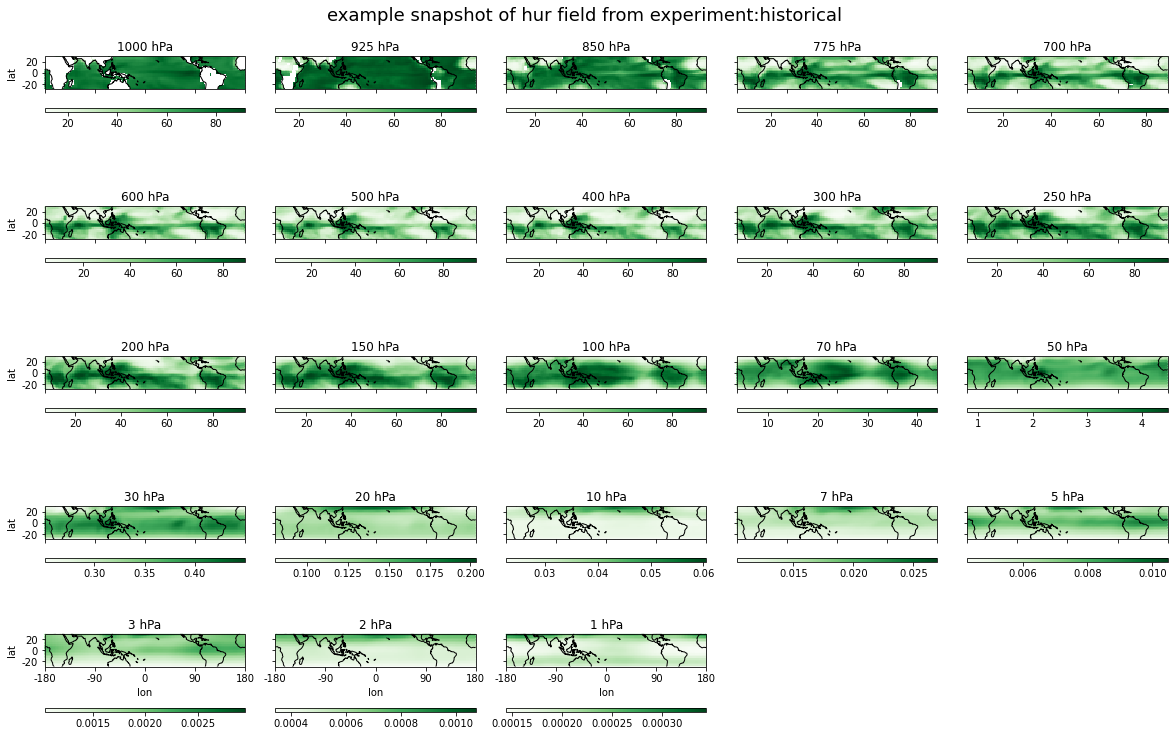

In [5]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6125)

for i, plev in enumerate(hur_day['plev']):
    ax= fig.add_subplot(5,5,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = get_dsvariable(variable, datasets[0], experiments[0],home, resolutions[0])[variable].isel(time=0)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


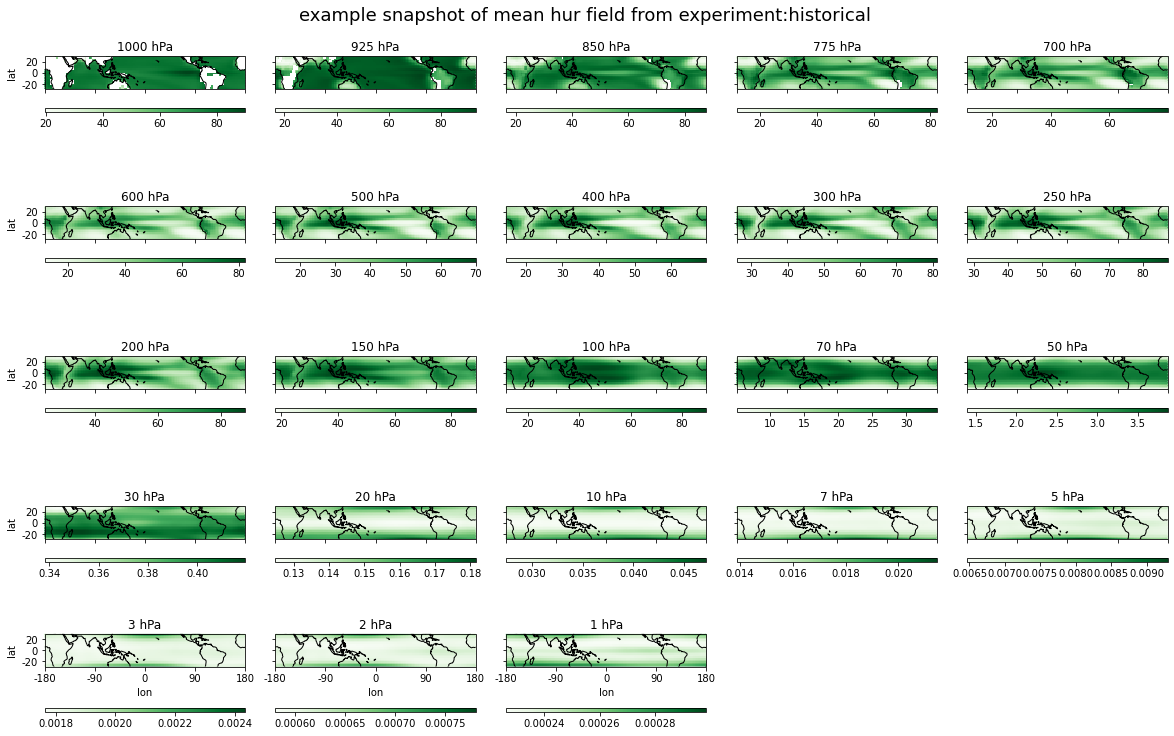

In [6]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of mean {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6125)

for i, plev in enumerate(hur_day['plev']):
    ax= fig.add_subplot(5,5,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = get_dsvariable(variable, datasets[0], experiments[0],home, resolutions[0])[variable].mean(dim='time')

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


In [7]:
ds['hur']

<xarray.DataArray 'hur' (time: 360, plev: 23, lat: 22, lon: 128)>
[23316480 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

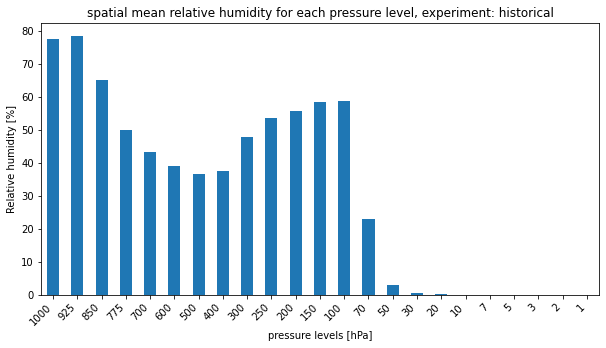

In [8]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
ds['hur'].weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('spatial mean relative humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Relative humidity [%]')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((ds['hur'].plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

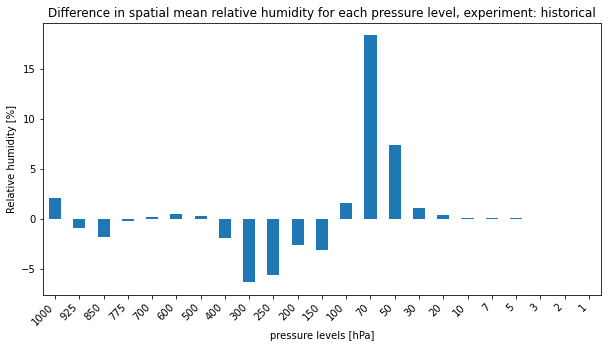

In [9]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))

hur_historical = get_dsvariable(variable, datasets[0], experiment = 'historical', resolution=resolutions[0])['hur']
hur_rcp = get_dsvariable(variable, datasets[0], experiment = 'rcp85', resolution=resolutions[0])['hur'] 

hur_diff = xr.DataArray(
    data=hur_rcp.data - hur_historical.data,
    dims=['time', 'plev','lat', 'lon'],
    coords={'time':hur_historical.time.data, 'plev':hur_historical.plev.data, 'lat': hur_historical.lat.data, 'lon': hur_historical.lon.data}
    )

hur_diff.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('Difference in spatial mean relative humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Relative humidity [%]')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((ds['hur'].plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

### free troposphere (<=850 hpa)

In [10]:
# As there are many missing values over land for 1000 hpa and 925 hpa, we can take the mass weighted mean of the relative humidity of 850 hpa and higher, 
# since it is only the mountains that are missing from those levels

In [11]:
hur = ds['hur'].sel(plev=slice(850e2,0))
hur = (hur * ds.plev).sum(dim='plev') / ds.plev.sum(dim='plev')
hur.attrs['units']= '%'
hur.attrs['Description'] = 'weighted mean relative humidity from 850-0 hpa'
hur

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[18.37336848, 17.01874757, 16.35828567, ..., 23.36721051,
         21.3476364 , 19.93454647],
        [15.37093001, 14.24472887, 13.52006902, ..., 20.24230311,
         18.38201278, 16.80624501],
        [14.3205436 , 13.26356704, 12.69560428, ..., 19.27169469,
         17.45768132, 15.75481323],
        ...,
        [15.42823579, 17.2864004 , 19.61657371, ..., 15.45996845,
         14.95206103, 14.55720249],
        [16.63829148, 18.46860417, 21.22462139, ..., 18.32492636,
         17.74005796, 16.77449057],
        [21.9335824 , 22.1997015 , 23.40441868, ..., 23.7470857 ,
         23.60689336, 22.74221332]],

       [[20.37699463, 18.11256928, 15.83341372, ..., 26.78498621,
         24.82714272, 22.60770496],
        [17.79309971, 15.16136064, 12.81695176, ..., 23.81962301,
         22.08444339, 20.13528923],
        [16.17082619, 13.65076842, 12.33156771, ..., 22.03635229,
         20.34443987, 18.37609904],
...
        [22.55330598, 22.76110395, 23.59237552, ..., 21.92288617,
         22.09999716, 22.32278543],
        [21.68274082, 21.90892663, 22.55891461, ..., 23.56268094,
         22.70695927, 22.00341543],
        [24.51224913, 24.03907542, 23.62525428, ..., 29.1667352 ,
         27.60218224, 25.74448408]],

       [[20.57775378, 19.52437224, 17.95939119, ..., 23.31711119,
         22.2021306 , 21.28251721],
        [17.12850872, 15.88219135, 14.23684154, ..., 19.55790649,
         18.50884742, 17.80768491],
        [15.33281551, 14.32976132, 12.93450868, ..., 17.90843952,
         16.81343901, 16.05932619],
        ...,
        [14.49431151, 14.58473535, 15.53409297, ..., 15.34657339,
         15.07321809, 14.71474219],
        [16.3291492 , 16.73659479, 17.95578755, ..., 17.32425554,
         17.07349995, 16.62871511],
        [21.53199604, 22.48397841, 23.36448029, ..., 22.38940236,
         22.41287735, 21.61739655]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:        %
    Description:  weighted mean relative humidity from 850-0 hpa

In [180]:
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

<xarray.Dataset>
Dimensions:  (plev: 23, time: 360, lat: 22, lon: 128)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hur      (time, plev, lat, lon) float32 ...

In [197]:
hur = ds['hur'].sel(plev=slice(850e2,0))
hur = (hur * hur.plev).sum(dim='plev') / hur.plev.sum(dim='plev')


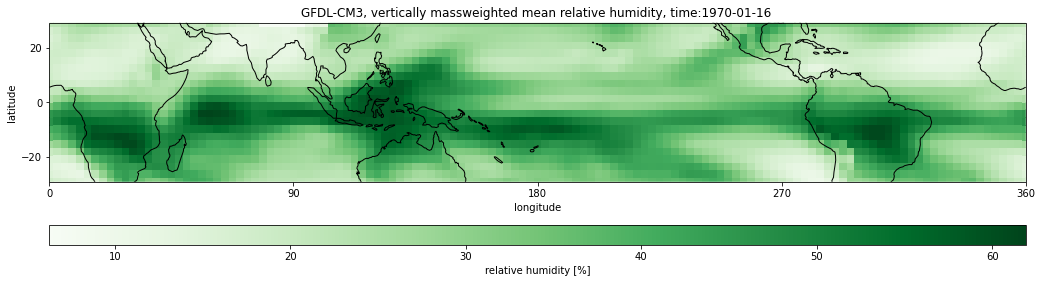

In [12]:
fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

scene = hur.isel(time=0)

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
ax.set_title(datasets[0] + ', vertically massweighted mean relative humidity, time:' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'relative humidity' + ' [{}]'.format(scene.attrs['units']))

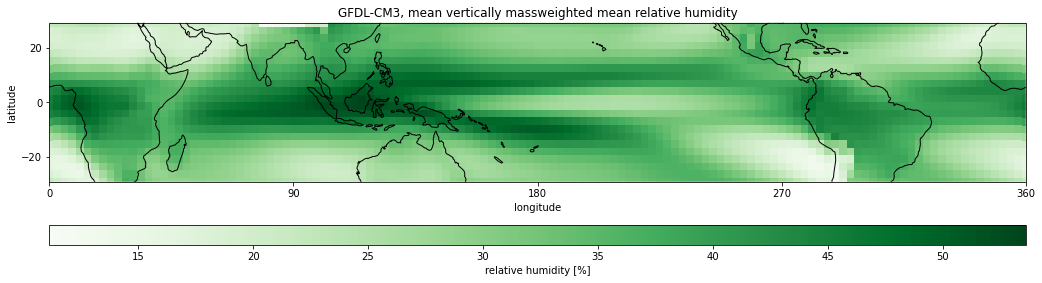

In [13]:
fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

scene = hur.mean(dim='time')

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
ax.set_title(datasets[0] + ', mean vertically massweighted mean relative humidity')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'relative humidity' + ' [{}]'.format(hur.attrs['units']))

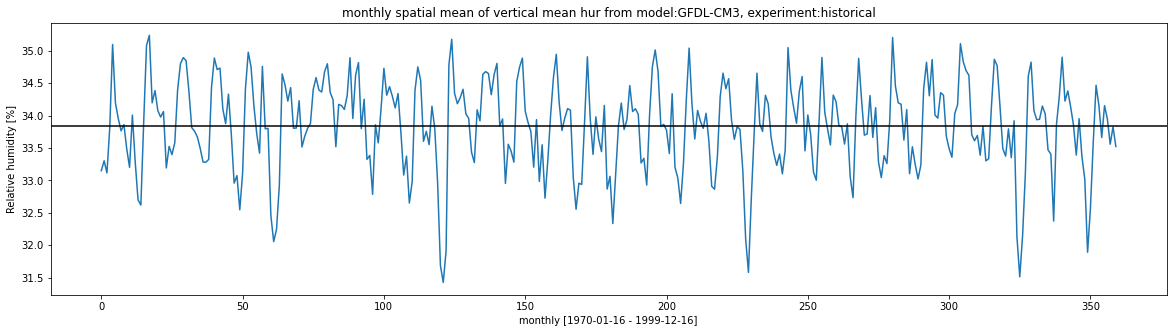

In [69]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly'
    ]

aWeights = np.cos(np.deg2rad(hur.lat))
y= hur.weighted(aWeights).mean(dim=('lat','lon')) 
title = '{} spatial mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], 'vertical mean hur', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(hur.isel(time=0).coords['time'].values)[:10], str(hur.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', hur.units)


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

In [175]:
# # to subtract the surrouding year to the monthly values (anomaly),  
# a = np.arange(1,37,1)
# time_var = pd.date_range("1970-01-16",periods=36,freq=pd.DateOffset(months=1))
# da = xr.DataArray(
#     data=a, 
#     dims=['time'], 
#     coords={'time':time_var})
# print(da)

# rolling_mean = da.rolling(time=12, center=True).mean()
# print(rolling_mean)
# # rolling_mean_shifted = rolling_mean.shift(time=-1)
# # print(rolling_mean_shifted)
# anomalies = da - rolling_mean
# print(anomalies)

Text(0, 0.5, 'Relative humidity [%]')

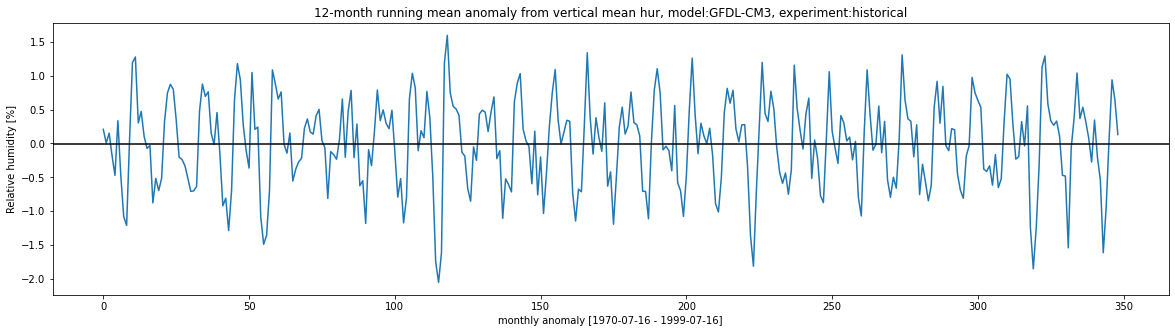

In [173]:
# 12-month running mean anomaly
aWeights = np.cos(np.deg2rad(hur.lat))
y= hur.weighted(aWeights).mean(dim=('lat','lon')) 

aWeights = np.cos(np.deg2rad(hur.lat))
y= hur.weighted(aWeights).mean(dim=('lat','lon')) 
rolling_mean = y.rolling(time=12, center=True).mean()
anomalies_annual = y - rolling_mean
anomalies_annual = anomalies_annual.dropna(dim='time')

title = '12-month running mean anomaly from {}, model:{}, experiment:{}'.format('vertical mean hur', datasets[0], experiments[0])
xlabel = '{} anomaly [{} - {}]'.format(timeMean_options[0], str(hur.isel(time=6).coords['time'].values)[:10], str(hur.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', hur.units)

plot_timeseries(anomalies_annual, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)


Text(0, 0.5, 'Relative humidity [%]')

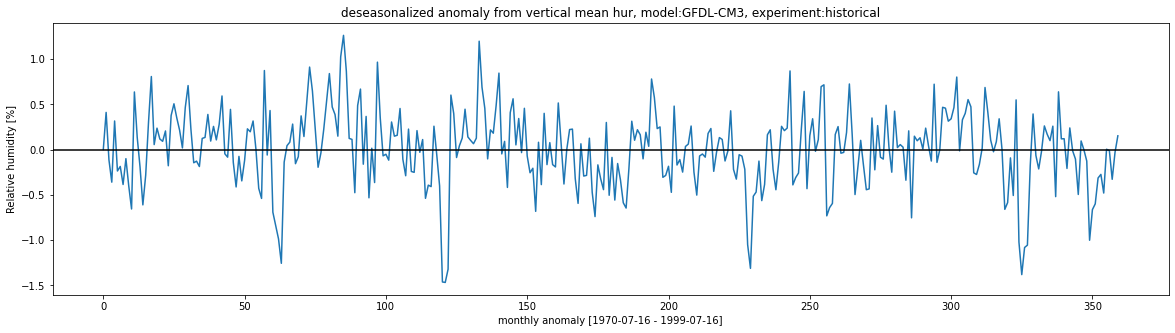

In [174]:
# monthly anomaly
a = hur.weighted(aWeights).mean(dim=('lat','lon'))
climatology = a.groupby('time.month').mean('time')
anomalies_monthly = a.groupby('time.month') - climatology 
#month_length = a.time.dt.days_in_month
#* month_length / month_length.mean()

title = 'deseasonalized anomaly from {}, model:{}, experiment:{}'.format('vertical mean hur', datasets[0], experiments[0])
xlabel = '{} anomaly [{} - {}]'.format(timeMean_options[0], str(hur.isel(time=6).coords['time'].values)[:10], str(hur.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', hur.units)

plot_timeseries(anomalies_monthly, title=title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

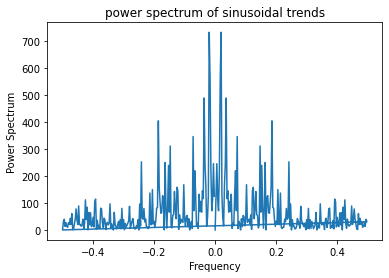

In [178]:
# Fourier transform
# 1. Calculate monthly anomalies
data = anomalies_monthly
# 2. Apply a Fourier transform to find frequencies of sinusoidal trends
fft_data = np.fft.fft(data)
# 3. identify dominant frequencies. Can be done visually by plotting the power spectrum and looking for peaks at the relevant frequencies. 
power_spectrum = np.abs(fft_data)**2
freqs = np.fft.fftfreq(len(data))
plt.plot(freqs, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('power spectrum of sinusoidal trends')
plt.show()
# (Alternatively, using statistical tests to determine which frequencies are significant)
# 4. fit a sinusoidal trend to the anomalies using the identified frequencies. 